# Forecating Alcohol Sales

## Author: Rohan Kulkarni

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alcohol=pd.read_csv(r'E:\Imarticus\11.TIME-SERIES\Alcohol_Sales.csv')

In [3]:
alcohol

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [4]:
alcohol.rename(columns={alcohol.columns[1] :"alcohol"},inplace=True)

In [5]:
alcohol

,DATE,alcohol
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [6]:
alcohol.DATE=pd.to_datetime(alcohol.DATE)

In [7]:
alcohol=alcohol.set_index(['DATE'])

In [8]:
alcohol

,alcohol
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


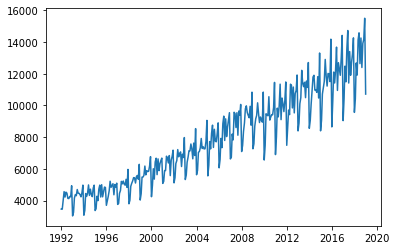

In [9]:
plt.plot(alcohol)

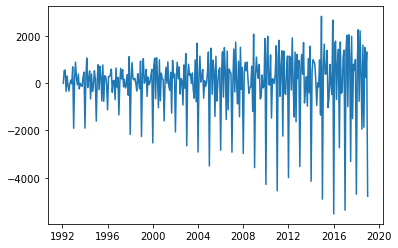

In [10]:
plt.plot(alcohol.diff())

In [11]:
alcohol_log=np.log(alcohol)

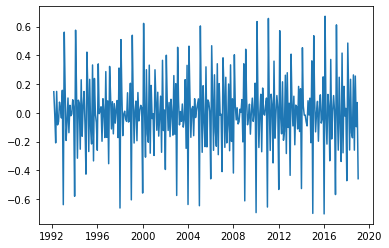

In [12]:
plt.plot(alcohol_log.diff().diff())

In [13]:
train=alcohol_log.iloc[:300,]
test=alcohol_log.iloc[300:,]

## Auto-ARIMA

In [14]:
import pmdarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [15]:
auto_arima(alcohol['alcohol'],seasonal=True,m=12)

ARIMA(order=(3, 1, 5), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [16]:
model_sarima=SARIMAX(train['alcohol'],order=(3, 1, 5),seasonal_order=(2, 1, 2, 12))

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [17]:
result=model_sarima.fit()

C:\Users\_RoXstaR_\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [18]:
pred_result=result.predict(start=300,end=325)

In [19]:
pred_result # These values are in log

2017-01-01    9.111903
2017-02-01    9.289219
2017-03-01    9.415875
2017-04-01    9.380180
2017-05-01    9.515297
2017-06-01    9.532468
2017-07-01    9.377915
2017-08-01    9.513642
2017-09-01    9.414882
2017-10-01    9.450585
2017-11-01    9.513589
2017-12-01    9.585706
2018-01-01    9.182135
2018-02-01    9.307674
2018-03-01    9.412539
2018-04-01    9.446532
2018-05-01    9.560541
2018-06-01    9.549510
2018-07-01    9.469812
2018-08-01    9.527731
2018-09-01    9.440388
2018-10-01    9.527000
2018-11-01    9.510685
2018-12-01    9.626168
2019-01-01    9.240799
2019-02-01    9.315596
Freq: MS, dtype: float64

In [20]:
error= np.exp(test.alcohol)- np.exp(pred_result) # we took antilog using exponential

In [21]:
error

2017-01-01    -19.528442
2017-02-01   -368.730443
2017-03-01    199.186537
2017-04-01   -360.149079
2017-05-01    -20.659911
2017-06-01    929.387647
2017-07-01   -408.340398
2017-08-01   -141.229784
2017-09-01   -362.622409
2017-10-01     -4.595932
2017-11-01   -281.512860
2017-12-01   -290.232033
2018-01-01   -157.889784
2018-02-01   -607.276886
2018-03-01    442.089082
2018-04-01   -745.170473
2018-05-01    -55.525031
2018-06-01    545.183037
2018-07-01   -322.446392
2018-08-01    521.615357
2018-09-01   -190.604125
2018-10-01    188.641532
2018-11-01    670.764647
2018-12-01    347.756218
2019-01-01    408.723555
2019-02-01           NaN
dtype: float64

In [22]:
MSE=np.mean(np.square(error))
MSE

171289.21915360738

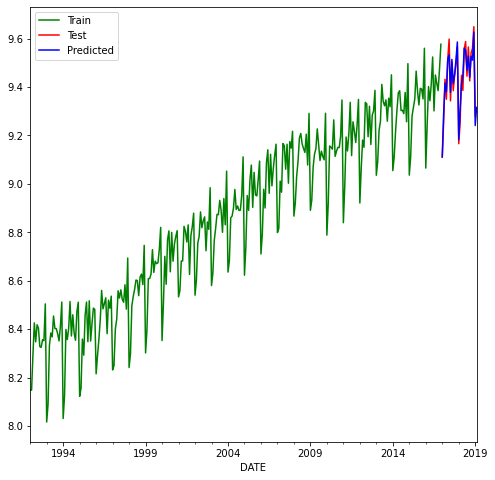

In [23]:
plt.figure(figsize =(8 , 8))
train['alcohol'].plot(legend = True , label = "Train" , color ="green")
test['alcohol'].plot(legend = True , label = "Test" , color ="red")
pred_result.plot(legend = True , label = "Predicted" , color ="blue")

## Model is capturing Seasonality very well.